In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
import plotly.express as px
import matplotlib.pyplot as plt

#Create a Bag Of words
from sklearn.feature_extraction.text import CountVectorizer
#Create Model to train data
from sklearn.naive_bayes import MultinomialNB

#Import library for Doing Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Create a Pipeline by using Pipeline function
from sklearn.pipeline import Pipeline

# Import these Library to check the performance of the model
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix

# Import the library to create a randomness among the numbers
from scipy.stats import randint

In [ ]:
data = pd.read_csv("ed.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [ ]:
data["labels"] = data["class"].map({0: "Hate Speech", 1: "Offensive Language", 2: "No Hate and Offensive"})
data = data[["tweet", "labels"]]
data.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,Offensive Language


In [ ]:
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('rt', '', text)
    text = re.sub('\\[.*?\\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)
data.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,labels
0,mayasolov woman shouldnt complain clean hous amp man alway take trash,No Hate and Offensive
1,boy dat coldtyga dwn bad cuffin dat hoe place,Offensive Language
2,urkindofbrand dawg ever fuck bitch sta cri confus shit,Offensive Language
3,cganderson vivabas look like tranni,Offensive Language
4,shenikarob shit hear might true might faker bitch told ya,Offensive Language
5,tmadisonx shit blow meclaim faith somebodi still fuck hoe,Offensive Language
6,brighterday sit hate anoth bitch got much shit go,Offensive Language
7,caus im tire big bitch come us skinni,Offensive Language
8,amp might get ya bitch back amp that,Offensive Language
9,rhythmixx hobbi includ fight mariambitch,Offensive Language


Check for NA values in the data set

In [ ]:
data.columns

Index(['tweet', 'labels'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   labels  24783 non-null  object
dtypes: object(2)
memory usage: 387.4+ KB


In [ ]:
data.isna().sum()

tweet     0
labels    0
dtype: int64

In [ ]:
fig=px.pie(data,data['labels'],title= 'Class distibution percentage')
fig.show()

In [ ]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
# Create a dictionary named as model_params which consist different parameters of different models
model_params= {
'Multinomial Naive bayes' : {
    'model' : MultinomialNB(),
    'params' : {
    }
},
'Decision Tree' : {
    'model' : DecisionTreeClassifier(),
    'params' : {
    }
}

}

In [ ]:
score=[]

#cm=Confusion Matrix
#acc=Accuracy
#auc=Area Under Curve
acc_list = []
cm_list = []

for model_name, mp in model_params.items():
    
    #creating the model
    clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',RandomizedSearchCV(mp['model'], mp['params'], n_iter = 50, cv = 5, verbose=1, random_state=None, 
                             n_jobs = -1, return_train_score=False))
    ])

    #fitting the train dataset into the model
    clf.fit(X_train, y_train)
    
    #predict the test data set using trained model
    y_pred = clf.predict(X_test)
    
    #finding the accuracy, AUC and Confussion Matrix of the model
    acc_list.append(accuracy_score(y_test,y_pred)*100)
    cm_list.append(confusion_matrix(y_test,y_pred))
    
    
    score.append (
        {
        'Model': model_name,
        }
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning:

The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning:

The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.



Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [ ]:
#Performence of the Model in Confussion Matrix
cm_list

[array([[   8,   28,  254],
        [   5,  491,  339],
        [  10,   48, 3774]]), array([[  97,   22,  171],
        [  31,  683,  121],
        [ 158,  141, 3533]])]

In [ ]:
#Creating the dataframe to compare the model
pd.set_option("display.max_colwidth", -1)
scores= pd.DataFrame(score,columns=['Model'])
acc_auc=pd.DataFrame({'Accuracy':acc_list})

#concat both the dataframe
result = pd.concat([scores, acc_auc], axis=1, join='inner')

# sort Best Accuracy in an decending order
result.sort_values(by=['Accuracy'], inplace=True, ascending=False)

result

<ipython-input-40-0b13fd8ec02d>:2: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,Model,Accuracy
1,Decision Tree,87.008271
0,Multinomial Naive bayes,86.201331


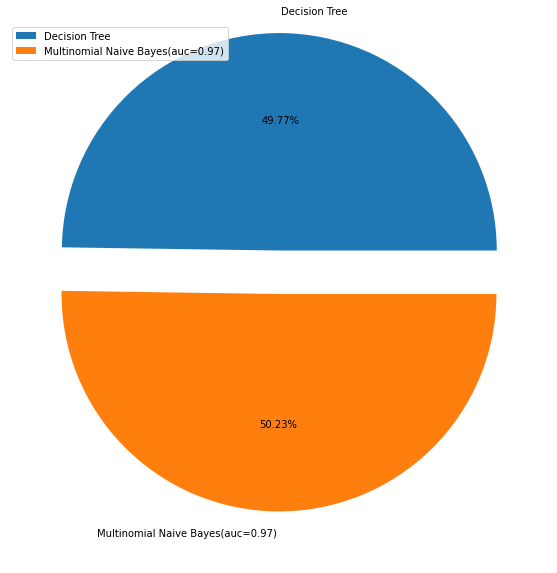

In [ ]:
#Plot the performance of Model
plt.figure(figsize=(10,10))
model_and_auc = ['Decision Tree','Multinomial Naive Bayes(auc=0.97)']
plt.pie(acc_list,labels=model_and_auc,explode = [0.2,0],autopct="%.2f%%")
plt.legend(loc='upper left')
plt.show()

In [ ]:
Speech=[
    'boy dat coldtyga dwn bad cuffin dat hoe place',
    'mayasolov woman shouldnt complain clean hous amp man alway take trash'
]

In [ ]:
clf.predict(Speech)

array(['Offensive Language', 'No Hate and Offensive'], dtype=object)